In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_o = plt.imread('nasa2.png')
img = img_o[-100:,:100,0]

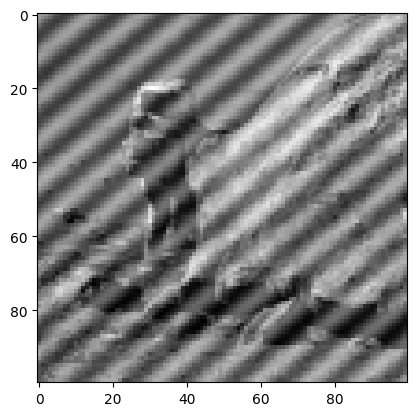

In [3]:
plt.imshow(img, cmap='grey')

# v, u = np.meshgrid(np.arange(N), np.arange(M), indexing='ij')
x, y = np.meshgrid(np.arange(M), np.arange(N), indexing='ij')
for v in range(M):
    for u in range(N):
        img2[u, v] = np.abs(np.sum(img[x, y] * np.exp(-2j * np.pi * (u * x / M) * (v * y / N))))

In [4]:
M, N = img.shape
img2 = np.zeros((M, N), dtype=np.complex64)
img3 = np.zeros((M, N), dtype=np.complex64)
img2_1 = np.zeros((M, N), dtype=np.complex64)

In [5]:
# # v, u = np.meshgrid(np.arange(N), np.arange(M), indexing='ij')
# x, y = np.meshgrid(np.arange(M), np.arange(N), indexing='ij')
# for u in range(M):
#     for v in range(N):
#         img2_1[u, v] = np.abs(np.sum(img[x, y] * np.exp(-2j * np.pi * (u * x / M) * (v * y / N))))

In [6]:
for x in range(M):
    for u in range(M):
        img2[u, :] += img[x, :] * np.exp(-2j * np.pi * (u * x / M))

In [7]:
for y in range(N):
    for v in range(N):
        img3[:, v] += img2[:, y] * np.exp(-2j * np.pi * (v * y / N))

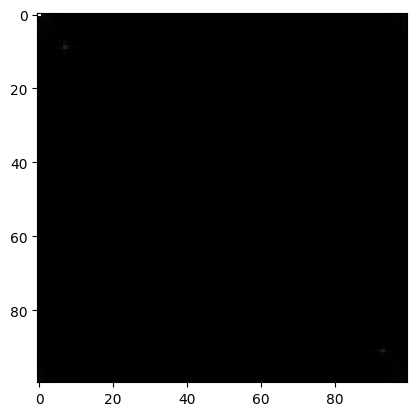

In [8]:
plt.imshow(abs(img3), cmap='grey')

In [9]:
# plt.imshow(abs(img2_1), cmap='grey')

In [10]:
m = np.arange(M, dtype=np.int8)
n = np.arange(N, dtype=np.int8)
x, y, u, v = np.meshgrid(m, n, m, n, indexing='ij')
f = img / 256
r = np.exp(-2j * np.pi * (u * x / M + v * y / N))
t = np.tensordot(r, f)
imgn = abs(t) * 256 / (M * N)

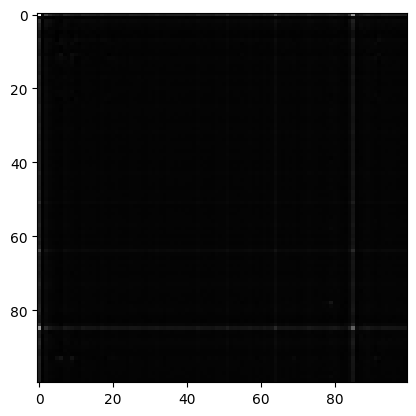

In [11]:
plt.imshow(imgn, cmap='grey')

In [12]:
# u, v, x, y = np.meshgrid(m, n, m, n, indexing='ij')
s = 1 / (M * N) * np.exp(2j * np.pi * (u * x / M + v * y / N))
fn = np.tensordot(s, t)
img_s = abs(fn) * 256 / (M * N)

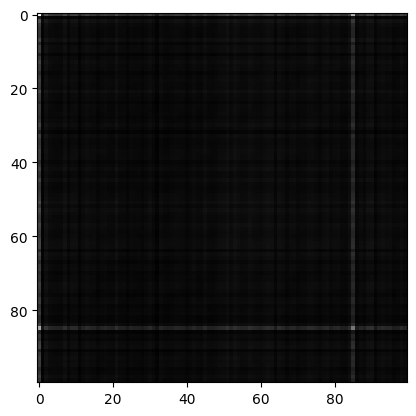

In [13]:
plt.imshow(img_s, cmap='grey')

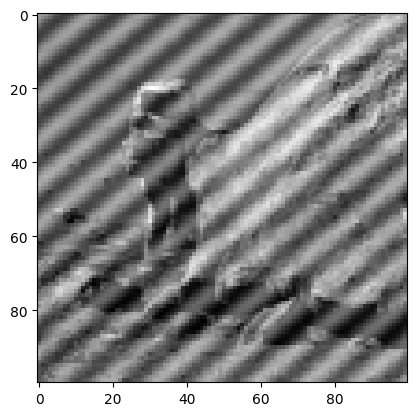

In [14]:
plt.imshow(img, cmap='grey')

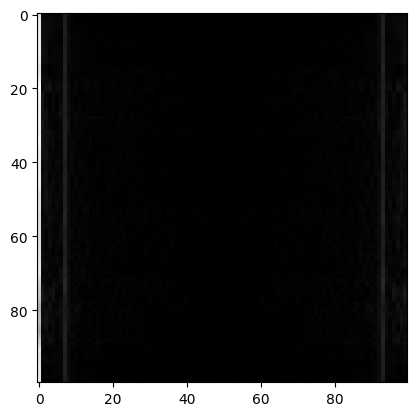

In [25]:
t2 = np.fft.fft(img)
plt.imshow(abs(t2) * 256, cmap='grey')

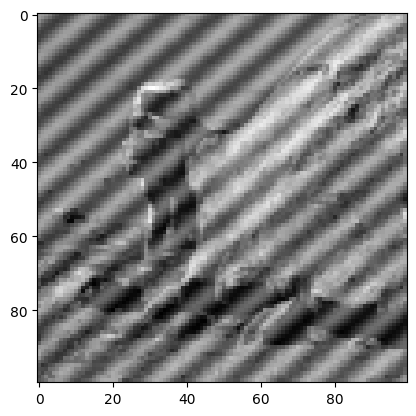

In [26]:
f2 = np.fft.ifft(t2)
plt.imshow(abs(f2) * 256, cmap='grey')